In [1]:
import pandas as pd
import pipes as pp
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
from sklearn.metrics import confusion_matrix, precision_score, \
              recall_score, f1_score, precision_recall_curve, roc_curve, roc_auc_score, \
              auc, mean_squared_error
from sklearn.metrics import confusion_matrix, precision_score, \
              recall_score, f1_score, precision_recall_curve, roc_curve, roc_auc_score, \
              auc, mean_squared_error, accuracy_score

# 1.We review the information. Preparing data for processing format

In [2]:
df = pd.read_csv('train.csv')
#df['CreditScore'] = df['CreditScore'].map({'Standard':0, 'Good':0,'Poor':1})
df = df.drop(['CustomerID','ID','Name','TypeofLoan','SSN'], axis = 1)

In [3]:
df = pp.myPipe.transform(df)

In [4]:
df

,Month,Age,AnnualIncome,MonthlyInhandSalary,NumBankAccounts,NumCreditCard,InterestRate,NumofLoan,Delayfromduedate,NumofDelayedPayment,...,Occupation_Scientist,Occupation_Teacher,Occupation_Writer,1,2,3,4,5,6,7
0,0.0,23.0,19114.12,1824.843333,3,4,3,4.0,3,7.0,...,1,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,23.0,19114.12,0.000000,3,4,3,4.0,-1,0.0,...,1,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,2.0,0.0,19114.12,0.000000,3,4,3,4.0,3,7.0,...,1,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,3.0,23.0,19114.12,0.000000,3,4,3,4.0,5,4.0,...,1,0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,4.0,23.0,19114.12,1824.843333,3,4,3,4.0,6,0.0,...,1,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,3.0,25.0,39628.99,3359.415833,4,6,7,2.0,23,7.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
99996,4.0,25.0,39628.99,3359.415833,4,6,7,2.0,18,7.0,...,0,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
99997,5.0,25.0,39628.99,3359.415833,4,6,5729,2.0,27,6.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
99998,6.0,25.0,39628.99,3359.415833,4,6,7,2.0,20,0.0,...,0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [5]:
X = df.drop(['CreditScore','PaymentBehaviour'], axis = 1)

In [6]:
Y = df['CreditScore']

In [7]:
Y.value_counts()

0    71002
1    28998
Name: CreditScore, dtype: int64

# scaling and standardization of values

In [8]:
from sklearn.preprocessing import StandardScaler
mms = StandardScaler()
X = mms.fit_transform(X)

#from sklearn.preprocessing import MinMaxScaler
#mms = MinMaxScaler()
#X = mms.fit_transform(X)

# Создание проверочного набора (Create a validation set)

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train,  Y_test = train_test_split(X, Y, test_size = 0.5, random_state = 0)

In [10]:
X_train.shape, Y_train.shape

((50000, 43), (50000,))

# a. ML With Teacher

# stochastic gradient descent (SGD) learning

Stochastic Gradient Descent (SGD) is a simple yet efficient optimization algorithm used to find the values of parameters/coefficients of functions that minimize a cost function. In other words, it is used for discriminative learning of linear classifiers under convex loss functions such as SVM and Logistic regression.

In [11]:
from sklearn.linear_model import SGDClassifier
SGDcl = SGDClassifier(max_iter=400,random_state=0)

In [12]:
SGDcl.fit(X_train, Y_train)

SGDClassifier(max_iter=400, random_state=0)

In [13]:
SGDcl.score(X_test,Y_test), SGDcl.score(X_train, Y_train)

(0.75942, 0.76238)

In [14]:
pred = SGDcl.predict(X_test)
pred

array([1, 0, 0, ..., 1, 0, 0], dtype=int64)

In [15]:
precision_score(Y_test, pred,average='micro'), recall_score(Y_test, pred,average='micro')
#'micro':Calculate metrics globally by counting the total true positives, false negatives and false positives.

(0.75942, 0.75942)

method decision_function:
Predict confidence scores for samples.
The confidence score for a sample is proportional to the signed distance of that sample to the hyperplane.

In [16]:
Y_score = SGDcl.decision_function(X_train)
pred2 = SGDcl.predict(X_train)

In [17]:
Y_score

array([ 1.06564379, -1.25280081, -1.04158378, ..., -2.15454041,
       -1.12936517,  0.48461339])

In [18]:
Y_score.shape

(50000,)

In [19]:
# мы фиксируем максим. и миним.значения у decision_function(X)
# we are fixing max and min value 
ma = Y_score.max() 
mi = Y_score.min()

In [20]:
ma, mi

(3.1280104934267863, -42.572064194819504)

In [21]:
#Получаем прогноз с помощью сравнения с барьером
#We get a forecast using a comparison with a barrier
predict = Y_score > 0

In [22]:
precision_score(Y_train, predict,average='micro'), recall_score(Y_train, predict,average='micro')

(0.76238, 0.76238)

In [23]:
confusion_matrix(Y_train,predict)

array([[31834,  3740],
       [ 8141,  6285]], dtype=int64)

In [24]:
#функция возвращает для разных значений порога значение точности и полноты
pre, rec, trans_2 = precision_recall_curve(Y_train, Y_score)

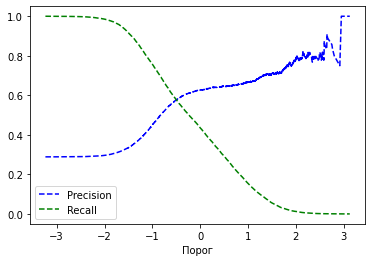

In [25]:
plt.plot(trans_2, pre[:-1], 'b--', label = 'Precision')
plt.plot(trans_2, rec[:-1], 'g--', label = 'Recall')
plt.xlabel('Порог')
plt.legend()
#
#

Text(0, 0.5, 'Точность')

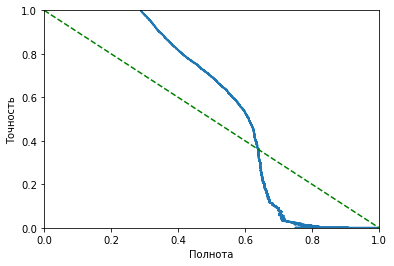

In [26]:
# переформатируем рисование - данные те же
plt.plot(pre, rec, linewidth = 2)
plt.plot([0,1], [1,0], 'g--')
plt.axis([0,1,0,1])
plt.xlabel('Полнота')
plt.ylabel('Точность')